1. **Source of data**: The data was sourced from Kaggle.  
2. **Data collection method**: The data was collected through surveys and user input.  
3. **Purpose of data**: The purpose is to visualize and analyze preferences based on location, income, distance from mountains/beaches, favorite seasons, and other factors.  
4. **Date of collection**: The data was collected in 2020.  

In [2]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)  # Adjust the width as needed
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('dataset.csv')

In [4]:
data.columns 

Index(['Age', 'Gender', 'Income', 'Education_Level', 'Travel_Frequency', 'Preferred_Activities', 'Vacation_Budget', 'Location', 'Proximity_to_Mountains', 'Proximity_to_Beaches', 'Favorite_Season', 'Pets', 'Environmental_Concerns', 'Preference'], dtype='object')

In [5]:
print(type(data))
print("Number of features : " , data.shape[1])
print("Number of examples : " , data.shape[0])

<class 'pandas.core.frame.DataFrame'>
Number of features :  14
Number of examples :  5000


In [6]:
data.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0


In [7]:
data = data.rename(columns={'Preference': 'Output'})

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     5000 non-null   int64 
 1   Gender                  5000 non-null   object
 2   Income                  5000 non-null   int64 
 3   Education_Level         5000 non-null   object
 4   Travel_Frequency        5000 non-null   int64 
 5   Preferred_Activities    5000 non-null   object
 6   Vacation_Budget         5000 non-null   int64 
 7   Location                5000 non-null   object
 8   Proximity_to_Mountains  5000 non-null   int64 
 9   Proximity_to_Beaches    5000 non-null   int64 
 10  Favorite_Season         5000 non-null   object
 11  Pets                    5000 non-null   int64 
 12  Environmental_Concerns  5000 non-null   int64 
 13  Output                  5000 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 547.0+ KB


In [9]:
data.describe()

,Age,Income,Travel_Frequency,Vacation_Budget,Proximity_to_Mountains,Proximity_to_Beaches,Pets,Environmental_Concerns,Output
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000
mean,43.584600,69590.470800,4.519800,2751.660000,151.31300,150.548200,0.494600,0.497400,0.24500
std,14.919094,28577.351251,2.870132,1289.334483,86.72536,86.137119,0.500021,0.500043,0.43013
min,18.000000,20040.000000,0.000000,500.000000,0.00000,0.000000,0.000000,0.000000,0.00000
25%,31.000000,44938.750000,2.000000,1656.750000,75.00000,77.000000,0.000000,0.000000,0.00000
50%,43.000000,69797.000000,4.000000,2748.500000,152.00000,149.000000,0.000000,0.000000,0.00000
75%,56.000000,94152.750000,7.000000,3873.000000,226.00000,226.000000,1.000000,1.000000,0.00000
max,69.000000,119954.000000,9.000000,4998.000000,299.00000,299.000000,1.000000,1.000000,1.00000


In [10]:
round(data.isnull().sum()/len(data) * 100,2)

Age                       0.0
Gender                    0.0
Income                    0.0
Education_Level           0.0
Travel_Frequency          0.0
Preferred_Activities      0.0
Vacation_Budget           0.0
Location                  0.0
Proximity_to_Mountains    0.0
Proximity_to_Beaches      0.0
Favorite_Season           0.0
Pets                      0.0
Environmental_Concerns    0.0
Output                    0.0
dtype: float64

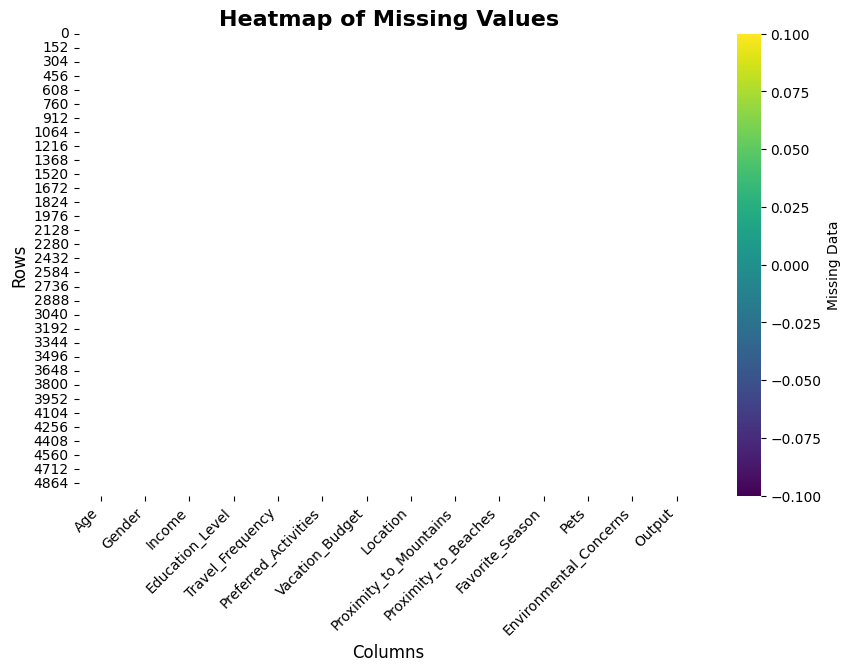

In [11]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.heatmap(data.isnull(),
            cmap='viridis',  # Use a visually appealing color map
            cbar=True,  # Add a color bar
            cbar_kws={'label': 'Missing Data'},  # Label for the color bar
            linewidths=0.5,  # Add lines to separate columns
            linecolor='white'  # Color of the line separating cells
           )

plt.title('Heatmap of Missing Values', fontsize=16, fontweight='bold')  # Add a title
plt.xlabel('Columns', fontsize=12)  # Label for x-axis
plt.ylabel('Rows', fontsize=12)  # Label for y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

## Unique values of all categories

In [12]:
print(data['Gender'].value_counts())

Gender
female        1745
non-binary    1651
male          1604
Name: count, dtype: int64


In [13]:
print(data['Education_Level'].value_counts())

Education_Level
doctorate      1264
bachelor       1258
master         1248
high school    1230
Name: count, dtype: int64


In [14]:
print(data['Favorite_Season'].value_counts())

Favorite_Season
summer    1286
fall      1253
winter    1243
spring    1218
Name: count, dtype: int64


In [15]:
print(data['Preferred_Activities'].value_counts())

Preferred_Activities
skiing        1278
sunbathing    1263
swimming      1251
hiking        1208
Name: count, dtype: int64


In [16]:
print(data['Favorite_Season'].value_counts())

Favorite_Season
summer    1286
fall      1253
winter    1243
spring    1218
Name: count, dtype: int64


In [17]:
print(data['Location'].value_counts())

Location
rural       1682
urban       1662
suburban    1656
Name: count, dtype: int64


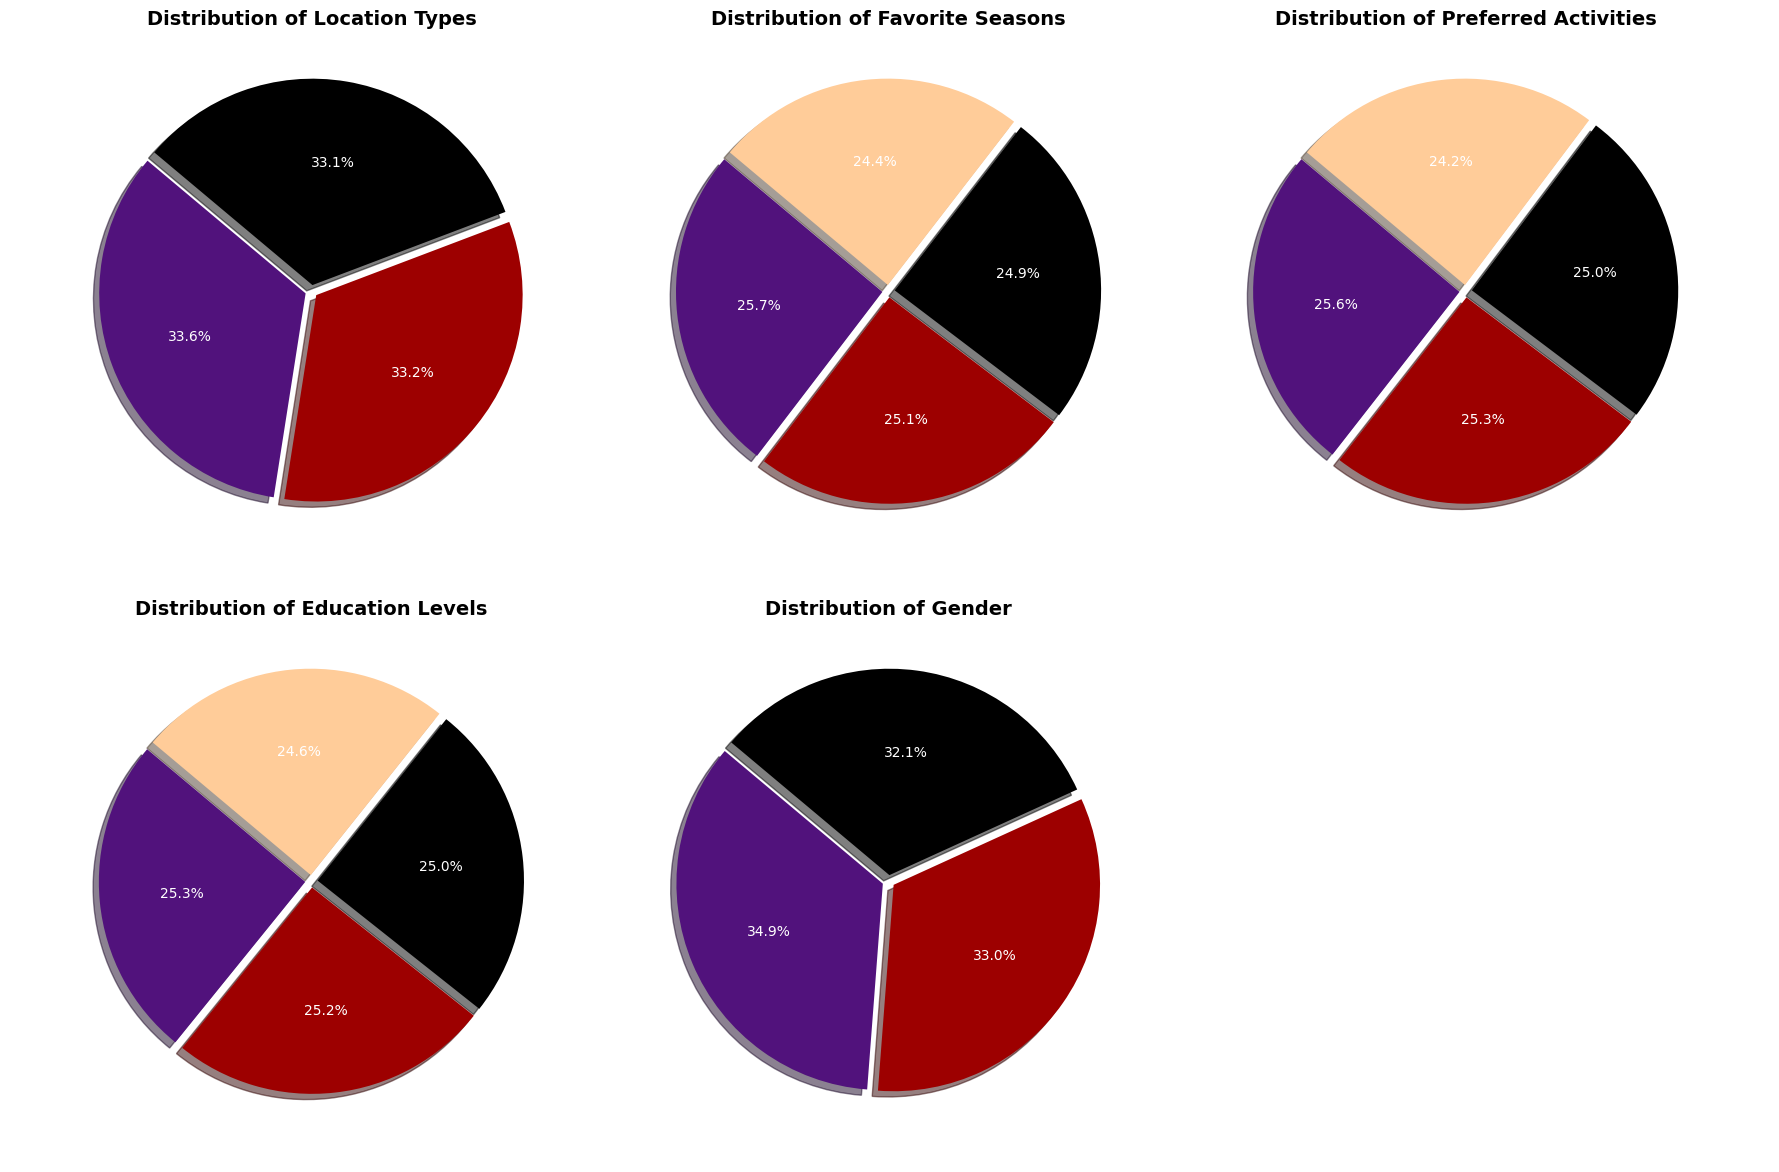

In [21]:

# Data for Location
labels1 = ['Rural', 'Urban', 'Suburban']
sizes1 = [1682, 1662, 1656]  
colors1 = ['#51127C','#9D0000','#000000']

# Data for Favorite Seasons
labels2 = ['Summer', 'Fall', 'Winter', 'Spring']
sizes2 = [1286, 1253, 1243, 1218]  
colors2 = ['#51127C','#9D0000','#000000', '#ffcc99']

# Data for Preferred Activities
labels3 = ['Skiing', 'Sunbathing', 'Swimming', 'Hiking']
sizes3 = [1278, 1263, 1251, 1208]  
colors3 = ['#51127C','#9D0000','#000000', '#ffcc99']

# Data for Education Levels
labels4 = ['Doctorate', 'Bachelor', 'Master', 'High School']
sizes4 = [1264, 1258, 1248, 1230]  
colors4 = ['#51127C','#9D0000','#000000', '#ffcc99']

# Data for Gender
labels5 = ['Female', 'Non-Binary', 'Male']
sizes5 = [1745, 1651, 1604]  
colors5 = ['#51127C','#9D0000','#000000']

# Create subplots for 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2 rows, 3 columns

# Plot for Location
axes[0, 0].pie(sizes1, 
               labels=labels1, 
               colors=colors1, 
               autopct='%1.1f%%', 
               startangle=140, 
               explode=(0.03, 0.03, 0.03), 
               shadow=True,
               textprops={'color': 'white'})  # Set text color to white
axes[0, 0].set_title('Distribution of Location Types', fontsize=14, fontweight='bold')

# Plot for Favorite Seasons
axes[0, 1].pie(sizes2, 
               labels=labels2, 
               colors=colors2, 
               autopct='%1.1f%%', 
               startangle=140, 
               explode=(0.03, 0.03, 0.03, 0.03), 
               shadow=True,
               textprops={'color': 'white'})  # Set text color to white
axes[0, 1].set_title('Distribution of Favorite Seasons', fontsize=14, fontweight='bold')

# Plot for Preferred Activities
axes[0, 2].pie(sizes3, 
               labels=labels3, 
               colors=colors3, 
               autopct='%1.1f%%', 
               startangle=140, 
               explode=(0.03, 0.03, 0.03, 0.03), 
               shadow=True,
               textprops={'color': 'white'})  # Set text color to white
axes[0, 2].set_title('Distribution of Preferred Activities', fontsize=14, fontweight='bold')

# Plot for Education Levels
axes[1, 0].pie(sizes4, 
               labels=labels4, 
               colors=colors4, 
               autopct='%1.1f%%', 
               startangle=140, 
               explode=(0.03, 0.03, 0.03, 0.03), 
               shadow=True,
               textprops={'color': 'white'})  # Set text color to white
axes[1, 0].set_title('Distribution of Education Levels', fontsize=14, fontweight='bold')

# Plot for Gender
axes[1, 1].pie(sizes5, 
               labels=labels5, 
               colors=colors5, 
               autopct='%1.1f%%', 
               startangle=140, 
               explode=(0.03, 0.03, 0.03), 
               shadow=True,
               textprops={'color': 'white'})  # Set text color to white
axes[1, 1].set_title('Distribution of Gender', fontsize=14, fontweight='bold')

# Hide the last empty subplot (axes[1, 2])
axes[1, 2].axis('off')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

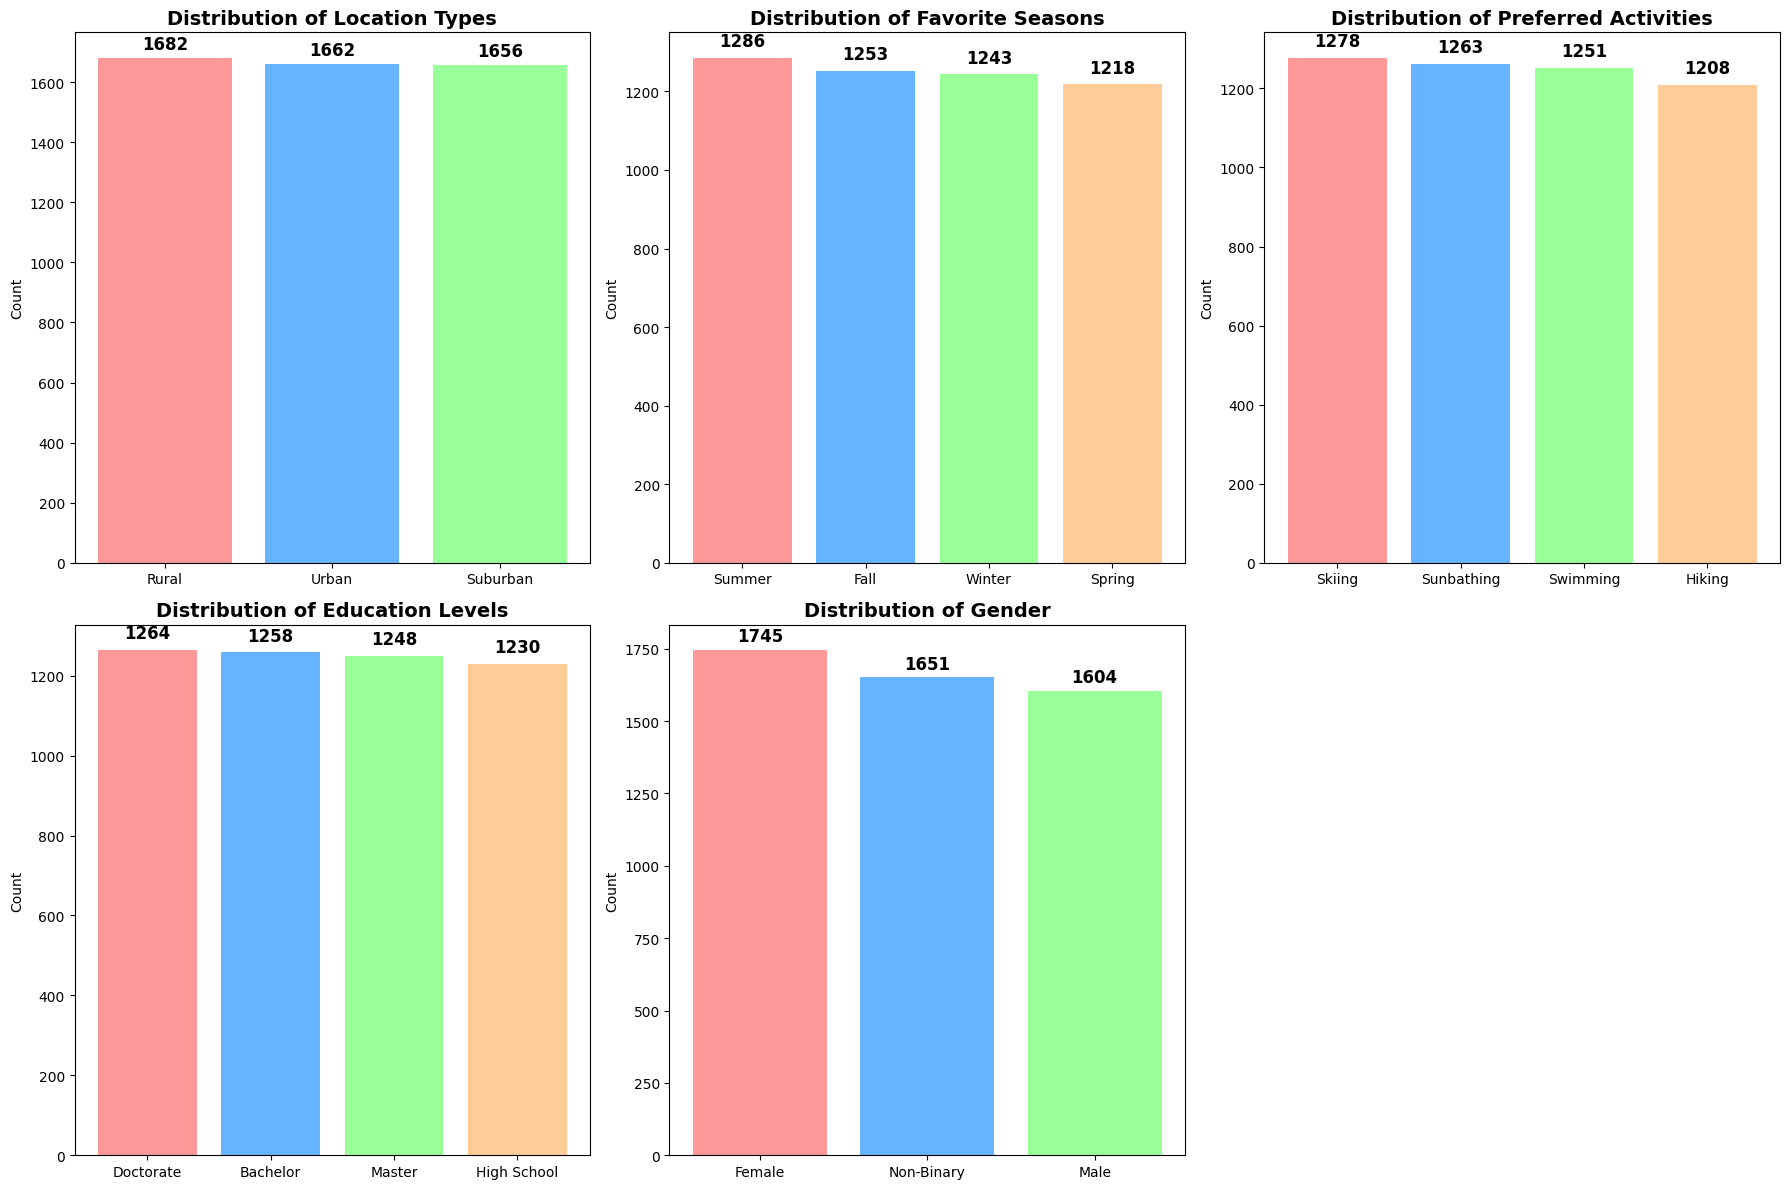

In [51]:
# Create subplots for 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2 rows, 3 columns

# Function to add annotations
def add_annotations(ax, values):
    for i, value in enumerate(values):
        ax.text(i, value + 30, str(value), ha='center', fontsize=12, fontweight='bold')

# Bar chart for Location
axes[0, 0].bar(labels1, sizes1, color=['#ff9999', '#66b3ff', '#99ff99'])
axes[0, 0].set_title('Distribution of Location Types', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Count')
add_annotations(axes[0, 0], sizes1)

# Bar chart for Favorite Seasons
axes[0, 1].bar(labels2, sizes2, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
axes[0, 1].set_title('Distribution of Favorite Seasons', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Count')
add_annotations(axes[0, 1], sizes2)

# Bar chart for Preferred Activities
axes[0, 2].bar(labels3, sizes3, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
axes[0, 2].set_title('Distribution of Preferred Activities', fontsize=14, fontweight='bold')
axes[0, 2].set_ylabel('Count')
add_annotations(axes[0, 2], sizes3)

# Bar chart for Education Levels
axes[1, 0].bar(labels4, sizes4, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
axes[1, 0].set_title('Distribution of Education Levels', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Count')
add_annotations(axes[1, 0], sizes4)

# Bar chart for Gender
axes[1, 1].bar(labels5, sizes5, color=['#ff9999', '#66b3ff', '#99ff99'])
axes[1, 1].set_title('Distribution of Gender', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Count')
add_annotations(axes[1, 1], sizes5)

# Hide the last empty subplot (axes[1, 2])
axes[1, 2].axis('off')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

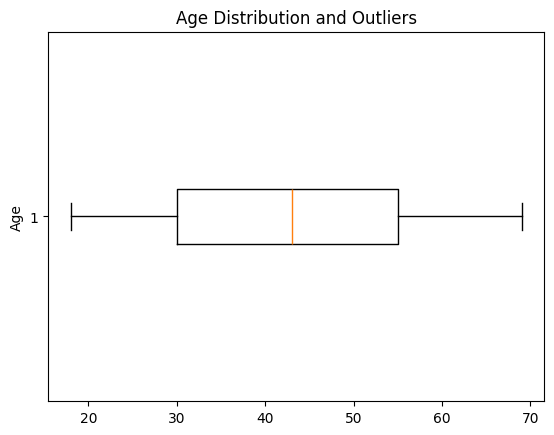

In [72]:
plt.boxplot(data["Age"].sample(200) , vert = False)

plt.title("Age Distribution and Outliers")
plt.ylabel("Age")

plt.show()

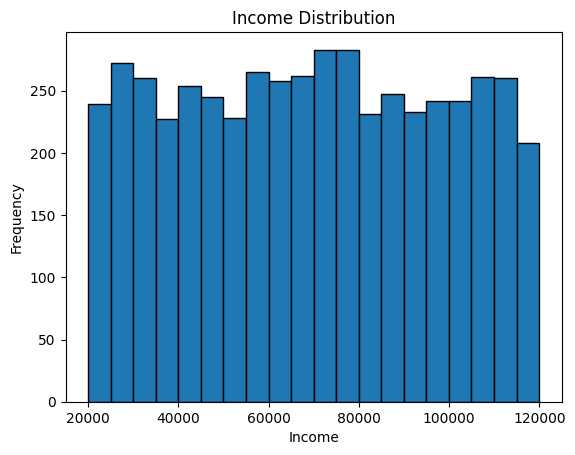

In [75]:
plt.hist(data["Income"], bins=20, edgecolor='black')

plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")

plt.show()

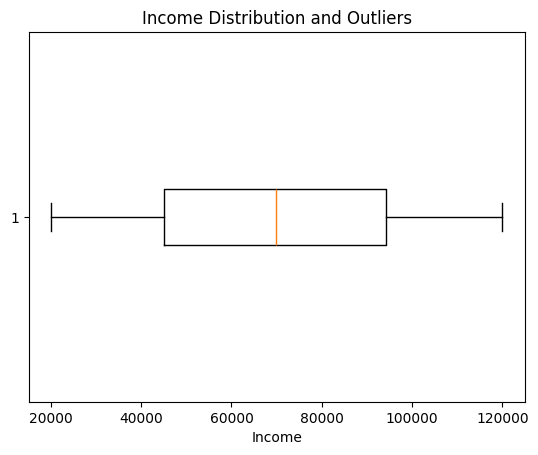

In [55]:
plt.boxplot(data["Income"], vert=False)

plt.title("Income Distribution and Outliers")
plt.xlabel("Income")

plt.show()

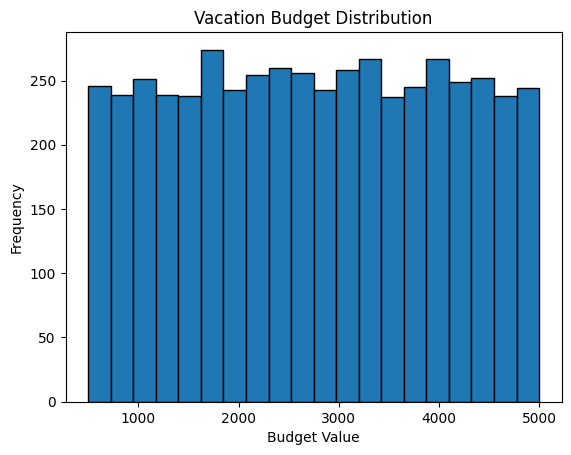

In [56]:
plt.hist(data["Vacation_Budget"], bins=20, edgecolor='black')

plt.title("Vacation Budget Distribution")
plt.xlabel("Budget Value")
plt.ylabel("Frequency")

plt.show()

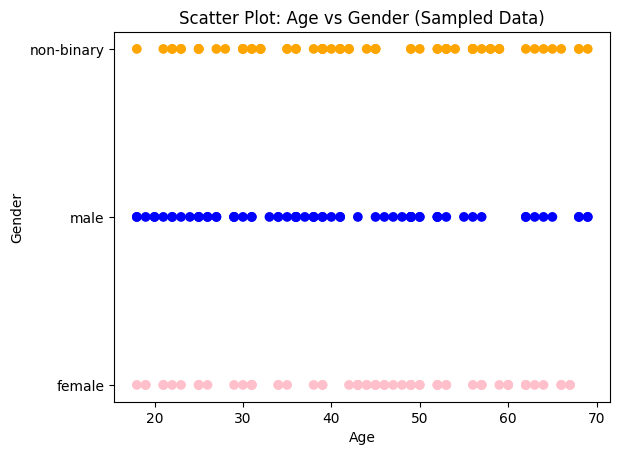

In [60]:
# Randomly select 200 points from the data
sampled_data = data.sample(n=200, random_state=42)

# Create color labels based on gender
colors = ['blue' if gender == 'male' else 'pink' if gender == 'female' else 'orange' for gender in sampled_data['Gender']]

# Create a scatter plot using the sampled data
plt.scatter(sampled_data["Age"], sampled_data["Gender"], c=colors)

# Add labels and title
plt.title("Scatter Plot: Age vs Gender (Sampled Data)")
plt.xlabel("Age")
plt.ylabel("Gender")

# Show the plot
plt.show()

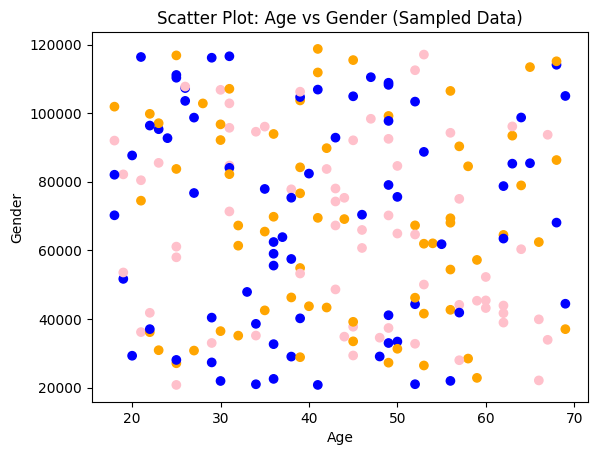

In [61]:
plt.scatter(sampled_data["Age"], sampled_data["Income"], c=colors)

# Add labels and title
plt.title("Scatter Plot: Age vs Gender (Sampled Data)")
plt.xlabel("Age")
plt.ylabel("Gender")

# Show the plot
plt.show()

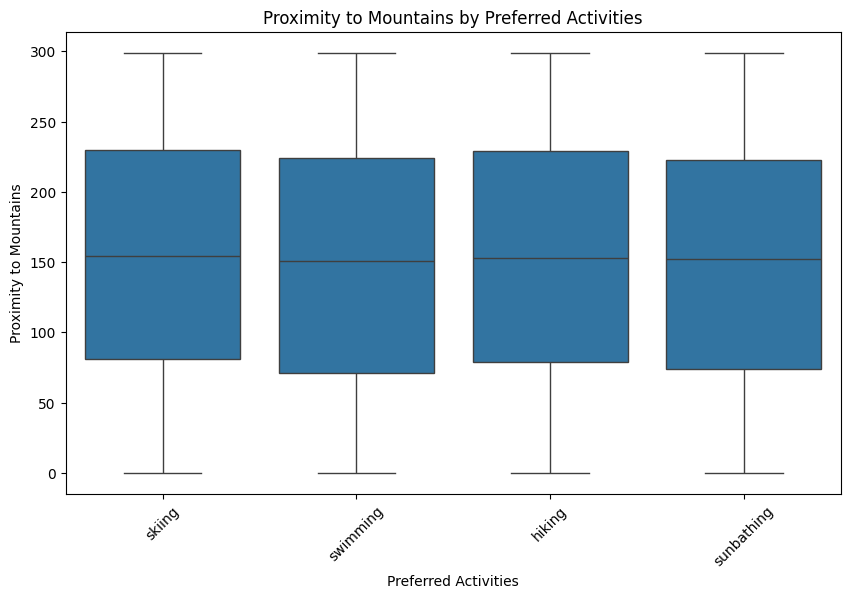

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Preferred_Activities', y='Proximity_to_Mountains', data=data)

# Add labels and title
plt.title("Proximity to Mountains by Preferred Activities")
plt.xlabel("Preferred Activities")
plt.ylabel("Proximity to Mountains")

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

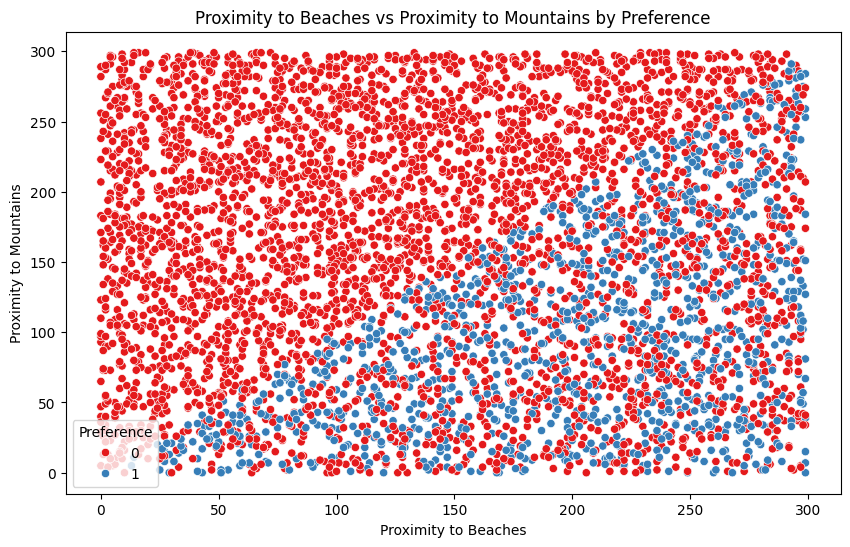

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Proximity_to_Beaches', y='Proximity_to_Mountains', hue='Output', data=data, palette='Set1')

# Add labels and title
plt.title("Proximity to Beaches vs Proximity to Mountains by Preference")
plt.xlabel("Proximity to Beaches")
plt.ylabel("Proximity to Mountains")

# Show the legend (automatically handled by seaborn, but you can customize it if needed)
plt.legend(title="Preference")

# Show the plot
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_15088\316277431.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Output', y='Vacation_Budget', data=data, palette='Set1')


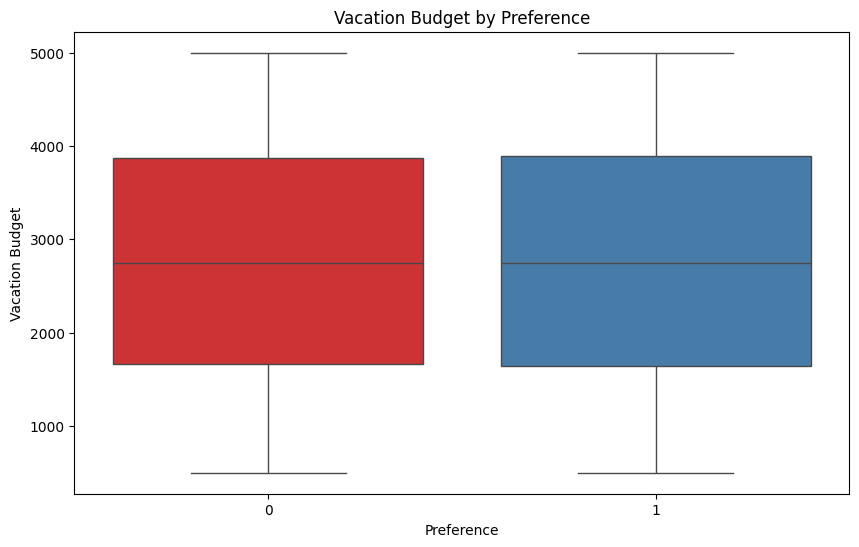

In [69]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Output', y='Vacation_Budget', data=data, palette='Set1')

# Add labels and title
plt.title("Vacation Budget by Preference")
plt.xlabel("Preference")
plt.ylabel("Vacation Budget")

# Show the plot
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_15088\3399440934.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Output', y='Travel_Frequency', data=data, palette='Set1')


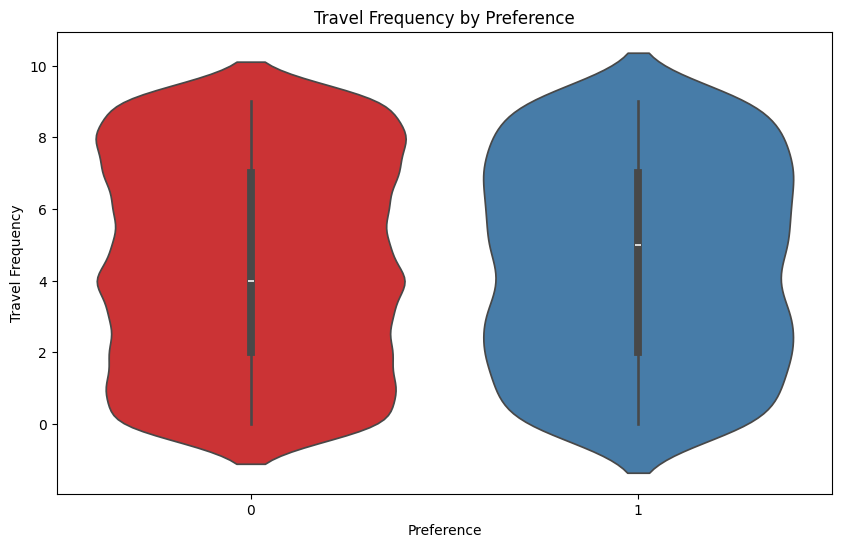

In [71]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Output', y='Travel_Frequency', data=data, palette='Set1')

# Add labels and title
plt.title("Travel Frequency by Preference")
plt.xlabel("Preference")
plt.ylabel("Travel Frequency")

# Show the plot
plt.show()